In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# local imports
import utils as ut
import plotting as plt2

# load the pangload markers

In [2]:
fpath = "../resources/PanglaoDB_Augmented_2021.txt"
pang = ut.load_pathway(fpath)  # Assuming 'ut.load_pathway' is a custom function to load the data

# Get gene sets
fb_genes = pang[pang['Fibroblasts']].index
hsc_genes = pang[pang['Hematopoietic Stem Cells']].index

# Print statements with clear descriptions
print(f"Number of genes for Fibroblasts: {len(fb_genes)}")
print(f"Number of genes for Hematopoietic Stem Cells: {len(hsc_genes)}")

Number of genes for Fibroblasts: 232
Number of genes for Hematopoietic Stem Cells: 178


# Load isoforms

In [3]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/merged_isoforms.h5ad"
adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()
adata

Memory usage: current 37.71 GB, difference +37.71 GB


AnnData object with n_obs × n_vars = 16130 × 99720
    obs: 'transcript_count', 'cluster_str', 'dataset', 'pred_phase', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'new_cluster', 'UMAP 1', 'UMAP 2'
    var: 'transcript_count', 'gene_name', 'gene_count', 'transcript_percent', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combat', 'log_norm', 'magic', 'norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.var.sort_values(by='gene_count', ascending=False).head()

,transcript_count,gene_name,gene_count,transcript_percent,highly_variable,means,dispersions,dispersions_norm
transcript_name,,,,,,,,
MT-ND2-201,111433.0,MT,3883813.0,0.028692,False,7.080271,7.922083,2.052504
MT-ND3-201,581213.0,MT,3883813.0,0.149650,False,8.815186,9.530885,1.240446
MT-ND6-201,18756.0,MT,3883813.0,0.004829,False,5.409387,6.927456,2.520587
MT-ATP6-201,158234.0,MT,3883813.0,0.040742,False,7.455031,8.213471,2.046947
MT-CO3-201,606383.0,MT,3883813.0,0.156131,False,8.804995,9.428702,1.152992


In [5]:
# Highly expressed transcripts
tdf = adata.var.copy()
tdf = tdf.sort_values(by='transcript_count', ascending=False)
tdf.head(15)

,transcript_count,gene_name,gene_count,transcript_percent,highly_variable,means,dispersions,dispersions_norm
transcript_name,,,,,,,,
S100A6-201,3411767.0,S100A6,3660307.0,0.932099,False,10.355869,9.704258,0.690186
MT2A-201,3131813.0,MT2A,3144358.0,0.996010,False,10.110067,9.448409,0.456613
TMSB10-201,2354677.0,TMSB10,2354677.0,1.000000,False,9.885851,7.692087,-1.146799
LGALS1-201,1982625.0,LGALS1,1988582.0,0.997004,False,9.670192,7.260574,-0.823478
FTL-201,1844336.0,FTL,1844336.0,1.000000,False,9.796557,9.530197,0.703266
RPS12-201,1409404.0,RPS12,1428296.0,0.986773,False,9.373591,7.155956,-0.893853
RPLP1-201,1380023.0,RPLP1,1410327.0,0.978513,False,9.161497,8.439440,0.306328
TIMP1-201,1289770.0,TIMP1,1294948.0,0.996001,False,9.311307,8.657158,0.492664
MT-CO2-201,1211085.0,MT,3883813.0,0.311829,False,9.496555,9.992223,1.014065


# depth differences

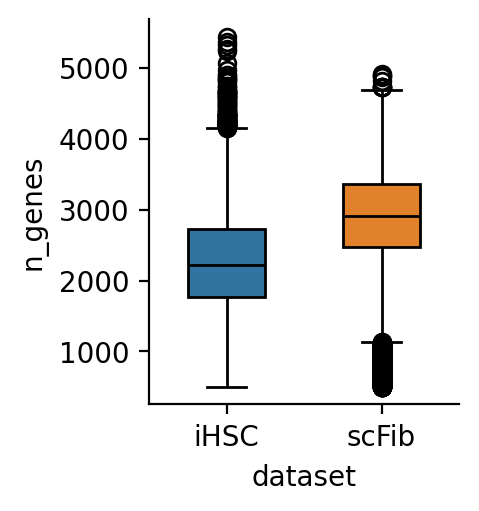

In [6]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 2, 2.5

sns.boxplot(
    data=adata.obs,
    x='dataset',
    y='n_genes',
    hue='dataset',
    width=0.5,
    linecolor='k',
)

sns.despine()

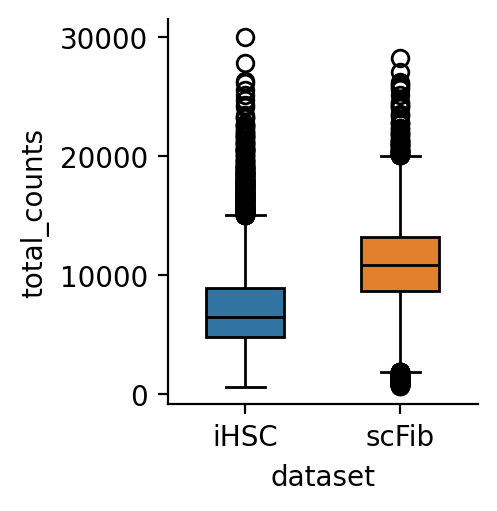

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 2, 2.5

sns.boxplot(
    data=adata.obs,
    x='dataset',
    y='total_counts',
    hue='dataset',
    width=0.5,
    linecolor='k',
)

sns.despine()

# distribution of non-zero transcripts

In [ ]:
for layer in adata.layers.keys():
    
    df = adata.to_df(layer=layer)
    
    df = pd.DataFrame({
        'barcode' : df.index,
        'dataset' : adata.obs['dataset'].values,
        'sum_counts' : df.sum(axis=1).values,
        'mean_counts' : df.mean(axis=1).values,
        'percent_nz' : (df != 0).sum(axis=1) / df.shape[1],
    })
    
    print(f"{layer=} {df.shape=}")
    # print(df.head())
    
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 6.5, 2.5
    fig, axs = plt.subplots(1, 3)
    
    columns = [
        'sum_counts',
        'mean_counts',
        'percent_nz',
    ]
    
    for i, col in enumerate(columns):    
        sns.boxplot(
            data=df,
            x='dataset',
            y=col,
            hue='dataset',
            width=0.35,
            linecolor='k',
            ax=axs[i]
        )
        
    plt.tight_layout()
    plt.suptitle(layer, y=1.1)
    sns.despine()
    plt.show()

# Some highly expressed transcripts

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 5
    
sc.pl.highest_expr_genes(
    adata,
)

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4.5, 4
    
sc.pl.highly_variable_genes(adata)

# gene annotations

In [ ]:
exp_df = adata.to_df(layer='raw_counts')
exp_df['group'] = adata.obs['dataset'].values
exp_df = exp_df.groupby('group').sum().T.reset_index()
exp_df['gene_name'] = exp_df['transcript_name'].apply(lambda x: x.split("-")[0])

cols = ['iHSC', 'scFib']
exp_df[['iHSC_gene_counts', 'scFib_gene_counts']] = exp_df.groupby('gene_name')[cols].transform('sum')
exp_df = exp_df.set_index('transcript_name')
exp_df = exp_df.drop(columns='gene_name')

adata.var = pd.concat([adata.var, exp_df], ignore_index=False, axis=1)

adata.var.head()

In [ ]:
break

In [ ]:
adata.var.head()

In [ ]:
break

# simple visualization

In [ ]:
def get_transcripts(gene_query, adata=adata):
    if not isinstance(gene_query, list):
        gene_query = [gene_query]
        
    transcript_list = adata.var[adata.var['gene_name'].isin(gene_query)].index
    return sorted(transcript_list)

get_transcripts('CD34')

In [ ]:
def plot_transcript(adata, transcript, layer='log_norm', ax=None, cmap='viridis', colorbar=True):
    pdf = adata.obs.copy()
    vector = np.ravel(adata[:, transcript].layers[layer].todense())
    sorted_idx = np.argsort(vector)
    vmax = vector.max()
    vmin = vector.min()
        
    if ax is None:
        fig, ax = plt.subplots()
    
    # Base scatterplot (black dots)
    sns.scatterplot(
        data=pdf,
        x='UMAP 1',
        y='UMAP 2',
        ec='k',
        color='k',
        s=25,
        zorder=1,
    )

    # Expression-colored scatterplot
    sns.scatterplot(
        data=pdf.iloc[sorted_idx],
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        hue=vector[sorted_idx],
        palette=cmap,
        s=7,
        zorder=1,
        legend=False,
    )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_aspect("auto")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(transcript)
    sns.despine(left=True)
    
    
    if colorbar:
        # Create colorbar
        norm = plt.Normalize(vmin, vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # This is necessary for the colorbar to work

        # Add colorbar to the plot
        cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.45)
    
    
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5.5, 5

plot_transcript(adata, 'CD34-204', layer='magic')

In [ ]:
gene = 'PTGS1'
layer = 'magic'
transcript_list = get_transcripts(gene, adata=adata)

for transcript in transcript_list:
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 5.5, 5
    plot_transcript(adata, transcript, layer)

# Gene annotations

In [ ]:
break

In [ ]:
gene = 'PTGS1'
layer = 'magic'
transcript_list = get_transcripts(gene, adata=adata)

for transcript in transcript_list:
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 5.5, 5
    plot_transcript(adata, transcript, layer)
    # break

In [ ]:
break

# DEG by dataset

In [ ]:
def plot_transcript(adata, transcript, ax=None, cmap='viridis', colorbar=True):
    pdf = adata.obs.copy()
    vector = np.ravel(adata[:, transcript].X.todense())
    sorted_idx = np.argsort(vector)
    vmax = vector.max()
    vmin = vector.min()
        
    if ax is None:
        fig, ax = plt.subplots()
    
    # Base scatterplot (black dots)
    sns.scatterplot(
        data=pdf,
        x='UMAP 1',
        y='UMAP 2',
        ec='k',
        color='k',
        s=25,
        zorder=1,
    )

    # Expression-colored scatterplot
    sns.scatterplot(
        data=pdf.iloc[sorted_idx],
        x='UMAP 1',
        y='UMAP 2',
        ec='none',
        hue=vector[sorted_idx],
        palette=cmap,
        s=7,
        zorder=1,
        legend=False,
    )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_aspect("auto")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(transcript)
    sns.despine(left=True)
    
    
    if colorbar:
        # Create colorbar
        norm = plt.Normalize(vmin, vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # This is necessary for the colorbar to work

        # Add colorbar to the plot
        cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.45)
    
    
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5.5, 5
plot_transcript(adata, 'CD34-204')

In [ ]:
gene = 'PTGS1'
layer = 'magic'
transcript_list = get_transcripts(gene, adata=adata)

for transcript in transcript_list:
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 5.5, 5
    plot_transcript(adata, transcript, layer)
    # break

# load in the Chen 2014 Data

In [ ]:
fpath = "../resources/chen_2014_isoforms.csv"
df = pd.read_csv(fpath)
print(f"{df.shape=}")
df = df[df['Model'] == 'HSC']
df = df[df['Gene_biotype'] == 'protein_coding']
df = df.sort_values(by='log(FC)', ascending=False)
print(f"{df.shape=}")

df[['External_gene_id', 'Model posterior probability']].head(20)

In [ ]:
hsc_pres = [x for x in hsc_genes if x in tdf['gene_name'].values]

exp_df = tdf[tdf['gene_name'].isin(hsc_pres)]
exp_df = exp_df[exp_df['transcript_percent'] < 0.9]
exp_df.head(15)

In [ ]:
gene = 'PTGS1'
layer = 'magic'
transcript_list = get_transcripts(gene, adata=adata)

for transcript in transcript_list:
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 5.5, 5
    plot_transcript(adata, transcript, layer)
    # break